In [4]:
from core.generate_points import get_points

svg_file_path = "data/fourier.svg"
pts_file_path = svg_file_path.replace(".svg", ".pts")

points = get_points(pts_file_path) # Complex number array

print(points)

[0.03266114-0.22278982j 0.03433856-0.22417314j 0.03610845-0.22531845j ...
 0.02683646-0.21730836j 0.02957938-0.21991355j 0.03266114-0.22278982j]


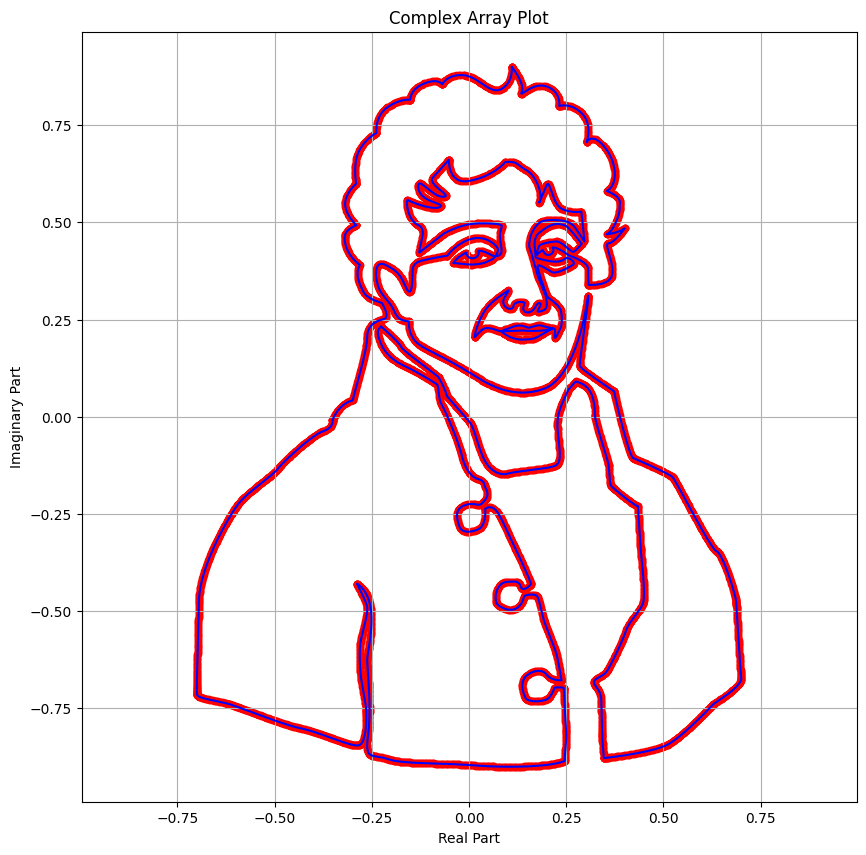

In [11]:
# plot complex array 
import matplotlib.pyplot as plt
import numpy as np

# Extract real and imaginary parts
real_parts = np.real(points)
imag_parts = -np.imag(points)

plt.figure(figsize=(10, 10))
plt.plot(real_parts, imag_parts, 'b-')
plt.scatter(real_parts, imag_parts, c='r', s=20)
plt.title('Complex Array Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.show()


In [5]:
# Sine Wave Animation 


(0.03266114077993665-0.22278981712423063j)

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_4810/585728465.py:51: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dots[i].set_data(x, y)


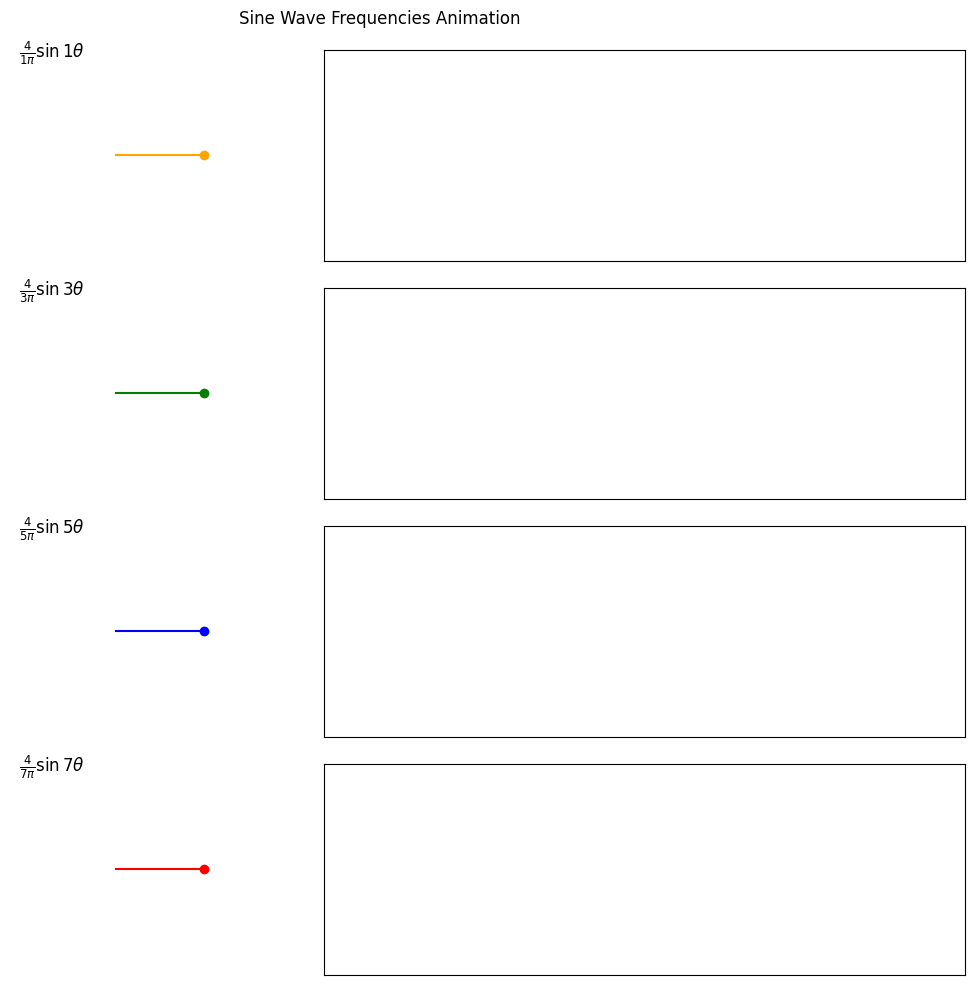

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
fig.suptitle('Sine Wave Frequencies Animation')

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Set up data
t = np.linspace(0, 2*np.pi, 1000)
frequencies = [1, 3, 5, 7]
colors = ['orange', 'green', 'blue', 'red']

# Initialize lines and circles
lines = []
circles = []
dots = []
for i, freq in enumerate(frequencies):
    # Circular motion
    circle, = axs[i*2].plot([], [], color=colors[i])
    dot, = axs[i*2].plot([], [], 'o', color=colors[i])
    axs[i*2].set_xlim(-1.2, 1.2)
    axs[i*2].set_ylim(-1.2, 1.2)
    axs[i*2].set_aspect('equal')
    axs[i*2].axis('off')
    
    # Sine wave
    line, = axs[i*2+1].plot([], [], color=colors[i])
    axs[i*2+1].set_xlim(0, 2*np.pi)
    axs[i*2+1].set_ylim(-1.2, 1.2)
    axs[i*2+1].set_xticks([])
    axs[i*2+1].set_yticks([])
    
    circles.append(circle)
    dots.append(dot)
    lines.append(line)
    
    # Add text label
    axs[i*2].text(-1.1, 1.1, f'$\\frac{{4}}{{{freq}\pi}}\\sin {freq}\\theta$', fontsize=12)

# Animation update function
def update(frame):
    for i, freq in enumerate(frequencies):
        # Update circular motion
        x = np.cos(freq * frame)
        y = np.sin(freq * frame)
        circles[i].set_data([0, x], [0, y])
        dots[i].set_data(x, y)
        
        # Update sine wave
        lines[i].set_data(t[:frame+1], np.sin(freq * t[:frame+1]))
    
    return circles + dots + lines

# Create animation
anim = FuncAnimation(fig, update, frames=len(t), interval=20, blit=True)

plt.tight_layout()
plt.show()